<a href="https://colab.research.google.com/github/Chaffee00/FA/blob/master/mental_h_kmean_agglomerative_meanshift_dbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h2><span style="font-weight:bolder; color:#367F41",>Mental Health_Clustering Algorithms</span></h2></center>

<a id="about"></a>
# <p style="background-color:#9CCC65;font-family:newtimeroman;font-size:100%;color:black;text-align:center;border-radius:15px 50px; padding:7px;border: 1px solid black;">About Dataset</p>

- **entity:** entity is a place (countriy) that is independent of another.
- **Code:** Country codes.
- **Schizophrenia disorders:** Schizophrenia is a serious mental health condition that affects how people think, feel and behave.
- **Depressive disorders:** It involves a depressed mood or loss of pleasure or interest in activities for long periods of time.
- **Anxiety disorders:** Anxiety disorders are a group of mental health conditions that cause fear, dread and other symptoms that are out of proportion to the situation.
- **Bipolar disorders:** Bipolar disorder, formerly called manic depression, is a mental health condition that causes extreme mood swings.
- **Eating disorders:** An eating disorder is a mental disorder defined by abnormal eating behaviors that adversely affect a person's physical or mental health. These behaviors may include eating either too much or too little.

<a id="about"></a>
# <p style="background-color:#9CCC65;font-family:newtimeroman;font-size:100%;color:black;text-align:center;border-radius:15px 50px; padding:7px;border: 1px solid black;">Import Libraries</p>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score , GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,precision_score,jaccard_score
from sklearn.metrics import recall_score,f1_score,fbeta_score, make_scorer,accuracy_score
from sklearn import metrics
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator
from scipy.spatial import distance_matrix
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import KMeans, MiniBatchKMeans, MeanShift, estimate_bandwidth, AffinityPropagation, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<a id="about"></a>
# <p style="background-color:#9CCC65;font-family:newtimeroman;font-size:100%;color:black;text-align:center;border-radius:15px 50px; padding:7px;border: 1px solid black;">Pre-Processing</p>

In [ ]:
data = pd.read_csv("/content/1- mental-illnesses-prevalence.csv")
df = pd.DataFrame(data)
df

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815
...,...,...,...,...,...,...,...,...
6415,Zimbabwe,ZWE,2015,0.201042,3.407624,3.184012,0.538596,0.095652
6416,Zimbabwe,ZWE,2016,0.201319,3.410755,3.187148,0.538593,0.096662
6417,Zimbabwe,ZWE,2017,0.201639,3.411965,3.188418,0.538589,0.097330
6418,Zimbabwe,ZWE,2018,0.201976,3.406929,3.172111,0.538585,0.097909


In [ ]:
df = df.rename(columns = {'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized': 'Schizophrenia',
                          'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': 'Depressive',
                          'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized': 'Anxiety',
                          'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized': 'Bipolar',
                          'Eating disorders (share of population) - Sex: Both - Age: Age-standardized': 'Eating'
})

In [ ]:
def eval_df(df):

    print('\nShape:')
    print(df.shape)
    print('\nColumns:')
    print(df.columns)
    print('\nInfo:')
    print(df.info())

eval_df(df)


Shape:
(6420, 8)

Columns:
Index(['Entity', 'Code', 'Year', 'Schizophrenia', 'Depressive', 'Anxiety',
       'Bipolar', 'Eating'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Entity         6420 non-null   object 
 1   Code           6150 non-null   object 
 2   Year           6420 non-null   int64  
 3   Schizophrenia  6420 non-null   float64
 4   Depressive     6420 non-null   float64
 5   Anxiety        6420 non-null   float64
 6   Bipolar        6420 non-null   float64
 7   Eating         6420 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 401.4+ KB
None


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6420.0,2004.500000,8.656116,1990.000000,1997.000000,2004.500000,2012.000000,2019.000000
Schizophrenia,6420.0,0.266604,0.039383,0.188416,0.242267,0.273477,0.286575,0.462045
Depressive,6420.0,3.767036,0.925286,1.522333,3.080036,3.636772,4.366252,7.645899
Anxiety,6420.0,4.101840,1.050543,1.879996,3.425846,3.939547,4.564164,8.624634
Bipolar,6420.0,0.636968,0.233391,0.181667,0.520872,0.579331,0.844406,1.506730
Eating,6420.0,0.195664,0.138380,0.044780,0.096416,0.144150,0.251167,1.031688


In [ ]:
df[df.duplicated()]

,Entity,Code,Year,Schizophrenia,Depressive,Anxiety,Bipolar,Eating


In [ ]:
df.columns

Index(['Entity', 'Code', 'Year', 'Schizophrenia', 'Depressive', 'Anxiety',
       'Bipolar', 'Eating'],
      dtype='object')

<a id="about"></a>
# <p style="background-color:#9CCC65;font-family:newtimeroman;font-size:100%;color:black;text-align:center;border-radius:15px 50px; padding:7px;border: 1px solid black;">Visualization</p>

In [ ]:
dff = df.drop(['Entity', 'Code', 'Year'], axis = 1)

<Axes: >

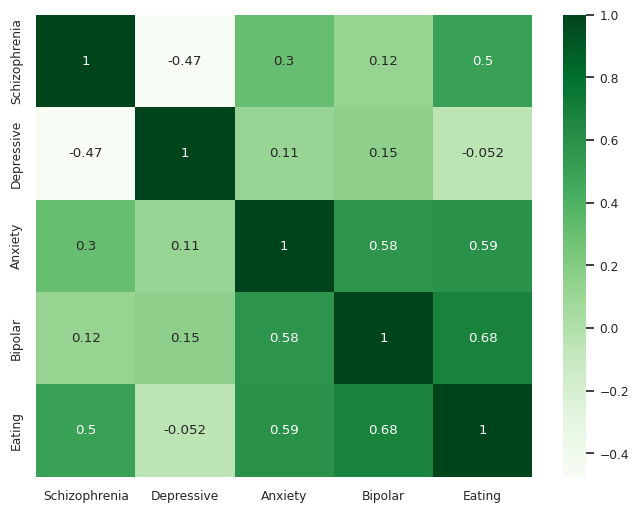

In [ ]:
sns.set(font_scale = 0.8)
plt.figure(figsize = (8, 6))
sns.heatmap(dff.corr(), annot = True, cmap = 'Greens')

In [ ]:
fig = px.scatter(df.iloc[:2000, :], x = 'Depressive', y = 'Eating', size = 'Bipolar')
fig.update_traces(marker = dict(color = 'green'))
fig.show()

In [ ]:
fig = px.scatter(df.iloc[:2000, :], x = 'Depressive', y = 'Anxiety', size = 'Eating')
fig.update_traces(marker = dict(color = 'green'))
fig.show()

In [ ]:
fig = px.scatter(df.iloc[:2000, :], x = 'Schizophrenia', y = 'Anxiety', size = 'Depressive')
fig.update_traces(marker = dict(color = 'green'))
fig.show()

In [ ]:
fig = px.scatter(df.iloc[:2000, :], x = 'Schizophrenia', y = 'Bipolar', size = 'Eating')
fig.update_traces(marker = dict(color = 'green'))
fig.show()

<Axes: xlabel='Schizophrenia', ylabel='Entity'>

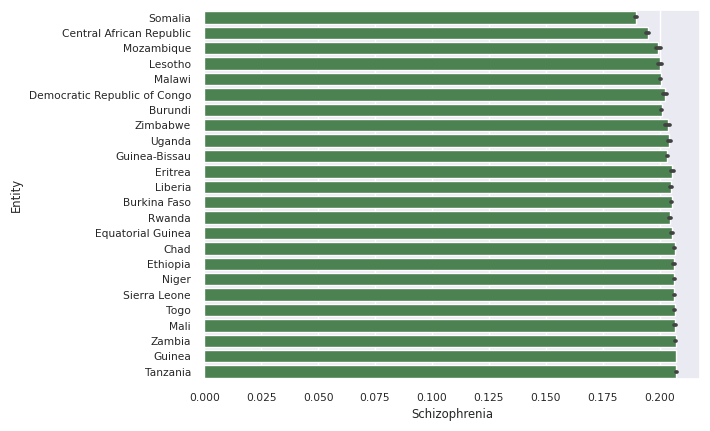

In [ ]:
sns.set(font_scale = 0.7)
sns.barplot(x = 'Schizophrenia', y = 'Entity', data = df.sort_values(by = 'Schizophrenia').head(500), color= '#438A4B')

<Axes: xlabel='Depressive', ylabel='Entity'>

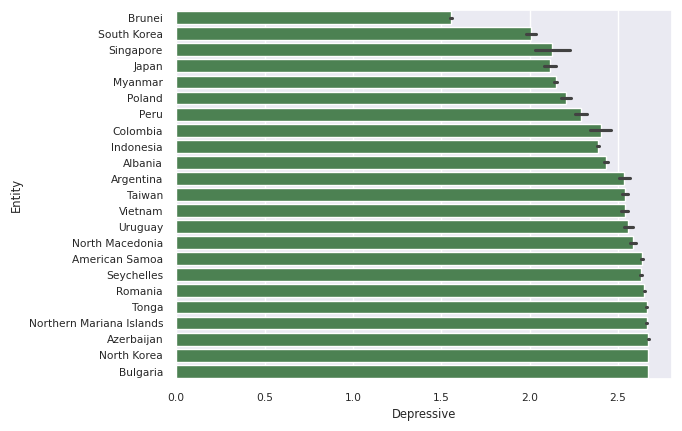

In [ ]:
sns.set(font_scale = 0.7)
sns.barplot(x = 'Depressive', y = 'Entity', data = df.sort_values(by = 'Depressive').head(500), color= '#438A4B')

<Axes: xlabel='Anxiety', ylabel='Entity'>

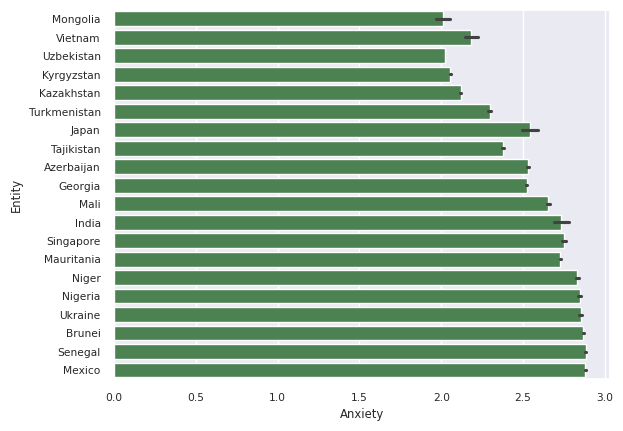

In [ ]:
sns.set(font_scale = 0.7)
sns.barplot(x = 'Anxiety', y = 'Entity', data = df.sort_values(by = 'Anxiety').head(500), color= '#438A4B')

<Axes: xlabel='Bipolar', ylabel='Entity'>

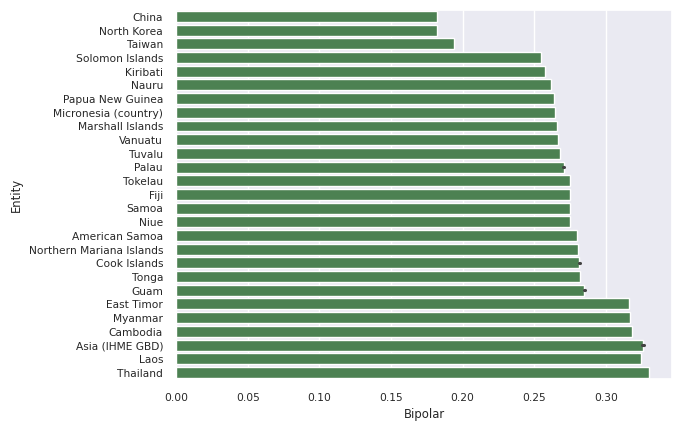

In [ ]:
sns.set(font_scale = 0.7)
sns.barplot(x = 'Bipolar', y = 'Entity', data = df.sort_values(by = 'Bipolar').head(800), color= '#438A4B')

<Axes: xlabel='Eating', ylabel='Entity'>

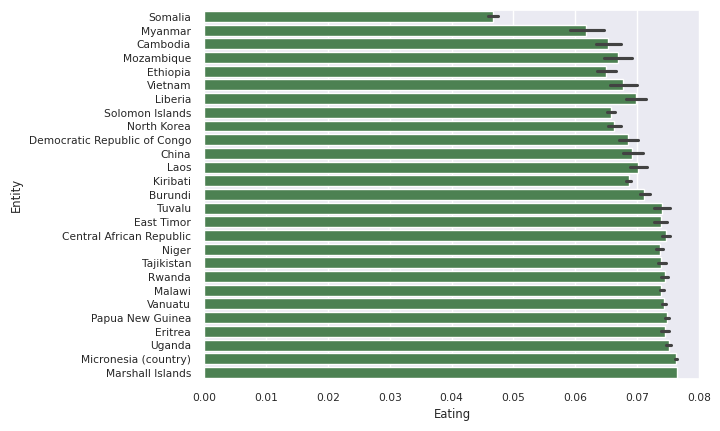

In [ ]:
sns.set(font_scale = 0.7)
sns.barplot(x = 'Eating', y = 'Entity', data = df.sort_values(by = 'Eating').head(500), color= '#438A4B')